In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
#Базовые настройки matplotlib
import warnings
warnings.filterwarnings('ignore')
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns

mlp.rcParams['lines.linewidth'] = 5
mlp.rcParams['xtick.major.size'] = 20
mlp.rcParams['xtick.major.width'] = 5
mlp.rcParams['xtick.labelsize'] = 20
mlp.rcParams['xtick.color'] = '#FF5533'

mlp.rcParams['ytick.major.size'] = 20
mlp.rcParams['ytick.major.width'] = 5
mlp.rcParams['ytick.labelsize'] = 20
mlp.rcParams['ytick.color'] = '#FF5533'

mlp.rcParams['axes.labelsize'] = 20
mlp.rcParams['axes.titlesize'] = 20
mlp.rcParams['axes.titlecolor'] = '#00B050'
mlp.rcParams['axes.labelcolor'] = '#00B050'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Откроем файл с данными.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ML/Yandex/credit_train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/ML/Yandex/credit_test.csv')
df.opened = df.opened.astype(int)

- id - анонимный id клиента
- gender - пол клиента
- age - возраст клиента
- marital_status - семейное положение клиента: в браке(MAR), не в браке(UNM), разведен (DIV), dв гражданском браке (CIV), вдова/вдовец (WID)
- credit_sum - сумма кредита
- credit_month - продолжительность кредита в месяцах
- tariff_id - ID кредитного тарифа
- education - образование клиента
- credit_count - кол-во кредитов до этого
- overdue_credit_count - кол-во просроченных кредитов до этого
- job_pos - позиция на работе
- credit_score - кредитный скоринг от банка
- income - доход
- opened - открыт ли кредит(переменная для предсказания)

In [ ]:
df.head()

,id,gender,age,marital_status,credit_sum,credit_month,tariff_id,education,credit_count,overdue_credit_count,job_pos,credit_score,region,income,opened
0,26031,M,24,UNM,"24000,00",10,1.60,SCH,2.0,0.0,SPC,"0,728851",ОБЛ ЛЕНИНГРАДСКАЯ,35000.0,1
1,148877,M,23,UNM,"16339,00",18,1.10,SCH,2.0,0.0,SPC,"0,347385",МОСКВА Г,38000.0,1
2,142019,M,54,UNM,"15652,00",10,1.32,GRD,2.0,0.0,SPC,"0,349705",ОБЛ МОСКОВСКАЯ,38000.0,1
3,146816,F,52,UNM,"16560,00",10,1.10,SCH,1.0,0.0,SPC,"0,359232",РЕСП МОРДОВИЯ,28000.0,0
4,27699,F,63,WID,"9078,00",18,1.10,SCH,4.0,0.0,SPC,"0,529368",ЧЕЛЯБИНСКАЯ ОБЛ,30000.0,0


In [ ]:
np.mean(df.opened)

0.1763739193524419

In [ ]:
df.opened.value_counts()

0    94222
1    20177
Name: opened, dtype: int64

In [ ]:
def prop(df,return_col = False):
  df_ = df.copy()
  col_return = []
  for col in df_.columns:
    col_col = df_[col].isna().sum()
    col_proc = df_[col].isna().mean()
    if col_col > 0:
      col_return.append(col)
      print(f"{col} - {col_col} - {col_proc}%")
  if return_col:
    return col_return

In [ ]:
prop(df)

credit_count - 6189 - 0.054100123252825635%
overdue_credit_count - 6189 - 0.054100123252825635%
region - 132 - 0.0011538562400020978%


In [ ]:
prop(df_test)

credit_count - 3041 - 0.05396915541200064%
overdue_credit_count - 3041 - 0.05396915541200064%
region - 60 - 0.0010648304257546985%
income - 1 - 1.774717376257831e-05%


In [ ]:
print(df.shape,df_test.shape)

(114399, 15) (56347, 14)


In [ ]:
df.describe(include = object)

,gender,marital_status,credit_sum,education,job_pos,credit_score,region
count,114399,114399,114399,114399,114399,114399,114267
unique,2,5,34552,5,18,15336,284
top,F,MAR,"22990,00",SCH,SPC,"0,207858",ОБЛ МОСКОВСКАЯ
freq,59592,62945,408,58721,90248,81,8192


In [ ]:
df.describe()

,id,age,credit_month,tariff_id,credit_count,overdue_credit_count,income,opened
count,114399.000000,114399.000000,114399.000000,114399.000000,108210.000000,108210.000000,114399.00000,114399.000000
mean,85282.186960,36.487819,10.979738,1.324131,2.107430,0.045680,40127.94354,0.176374
std,49319.646606,10.540360,3.527202,0.235520,1.774349,0.210553,25094.78145,0.381140
min,2.000000,18.000000,3.000000,1.000000,0.000000,0.000000,5000.00000,0.000000
25%,42608.500000,28.000000,10.000000,1.100000,1.000000,0.000000,25000.00000,0.000000
50%,85332.000000,34.000000,10.000000,1.320000,2.000000,0.000000,35000.00000,0.000000
75%,127917.500000,43.000000,12.000000,1.600000,3.000000,0.000000,50000.00000,0.000000
max,170746.000000,71.000000,36.000000,1.960000,21.000000,3.000000,950000.00000,1.000000


In [ ]:
df['tariff_id'].unique()

array([1.6 , 1.1 , 1.32, 1.5 , 1.19, 1.16, 1.43, 1.4 , 1.  , 1.21, 1.9 ,
       1.44, 1.3 , 1.17, 1.91, 1.2 , 1.94, 1.7 , 1.24, 1.23, 1.22, 1.18,
       1.41, 1.25, 1.28, 1.26, 1.27, 1.29, 1.48, 1.52, 1.56, 1.96])

In [ ]:
df['credit_sum'] = df['credit_sum'].apply(lambda x: x.replace(',','.'))
df['credit_score'] = df['credit_score'].apply(lambda x: x.replace(',','.'))
df['credit_sum'] = df['credit_sum'].astype(float).astype(int)
df['credit_score'] = df['credit_score'].astype(float)
df['tariff_id'] = df['tariff_id'].astype(str)


In [ ]:
df_test['credit_sum'] = df_test['credit_sum'].apply(lambda x: x.replace(',','.'))
df_test['credit_score'] = df_test['credit_score'].apply(lambda x: x.replace(',','.'))
df_test['credit_sum'] = df_test['credit_sum'].astype(float).astype(int)
df_test['credit_score'] = df_test['credit_score'].astype(float)
df_test['tariff_id'] = df['tariff_id'].astype(str)

<Axes: >

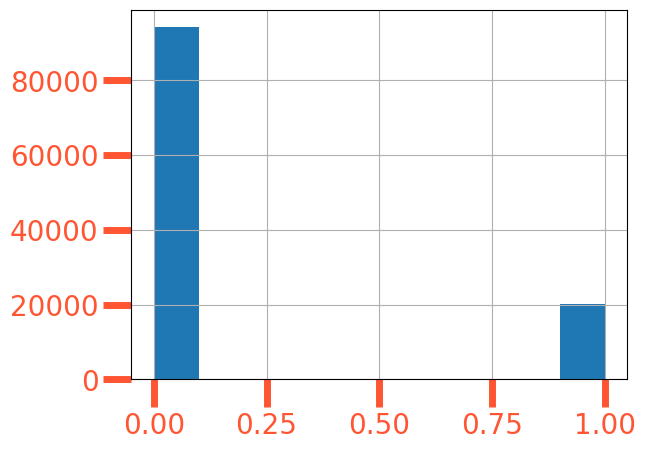

In [ ]:
df.opened.hist()

In [ ]:
df.credit_count.value_counts()

1.0     30349
2.0     24826
0.0     17272
3.0     15953
4.0      9381
5.0      5155
6.0      2651
7.0      1328
8.0       677
9.0       292
10.0      159
11.0       75
12.0       42
13.0       20
14.0       11
15.0       11
17.0        3
16.0        2
19.0        2
21.0        1
Name: credit_count, dtype: int64

In [ ]:
df.tariff_id.unique()

array(['1.6', '1.1', '1.32', '1.5', '1.19', '1.16', '1.43', '1.4', '1.0',
       '1.21', '1.9', '1.44', '1.3', '1.17', '1.91', '1.2', '1.94', '1.7',
       '1.24', '1.23', '1.22', '1.18', '1.41', '1.25', '1.28', '1.26',
       '1.27', '1.29', '1.48', '1.52', '1.56', '1.96'], dtype=object)

In [ ]:
numeric_columns = df.loc[:,df.dtypes != object].columns
object_columns = df.loc[:,df.dtypes == object].columns

In [ ]:
def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df[numeric_columns], 10))

Top Absolute Correlations
credit_sum            income                  0.353510
                      credit_month            0.226458
credit_count          overdue_credit_count    0.174984
overdue_credit_count  credit_score            0.169223
age                   credit_score            0.163392
credit_count          income                  0.149769
age                   credit_count            0.113885
credit_score          income                  0.109618
age                   credit_sum              0.096230
credit_count          credit_score            0.092662
dtype: float64


In [ ]:
def form(df_,columns,y):
  df = df_.copy()
  object_columns = columns


  mean_category = {}
  count_category = {}

  for col in object_columns:
    mean_category[col] = {}
    df_group = df.groupby(col).mean()[y]
    col_ = df_group.index
    mean_price = df_group.values
    mean_category[col] = {x:y for x,y in zip(col_,mean_price)}

    count_category[col] = {}
    df_group = df.groupby(col).count()[y]
    col_ = df_group.index
    count_price = df_group.values
    count_category[col] = {x:y for x,y in zip(col_,count_price)}

  boxplot_category = {}
  for col in object_columns:
    boxplot_category[col] = {}
    for val in df[col].unique():
      boxplot_category[col][val] = df[df[col] == val][y].values
  return mean_category, count_category,boxplot_category


def visual_form(df_,columns,y):
  df = df_.copy()
  object_columns = columns

  mean_category, count_category ,boxplot_category = form(df,object_columns,y)
  fig = plt.figure()
  fig.set_size_inches(38,100)
  number_ax = 1

  for col in object_columns:
    ax = fig.add_subplot(len(object_columns),3,number_ax)
    plt.bar(list(mean_category[col].keys()),mean_category[col].values())
    plt.title(f"Mean price for {col}")
    plt.xticks(rotation = 45)

    ax_2 = fig.add_subplot(len(object_columns),3,number_ax + 1)
    plt.bar(list(count_category[col].keys()),count_category[col].values())
    plt.title(f"Count for {col}")
    plt.xticks(rotation = 45)


    ax_3 = fig.add_subplot(len(object_columns),3,number_ax + 2)
    plt.boxplot(list(boxplot_category[col].values()),labels = list(boxplot_category[col].keys()))
    plt.title(f"Boxplot for {col}")
    plt.xticks(rotation = 45)
    number_ax += 3




  fig.tight_layout(h_pad= 2)
  plt.show()



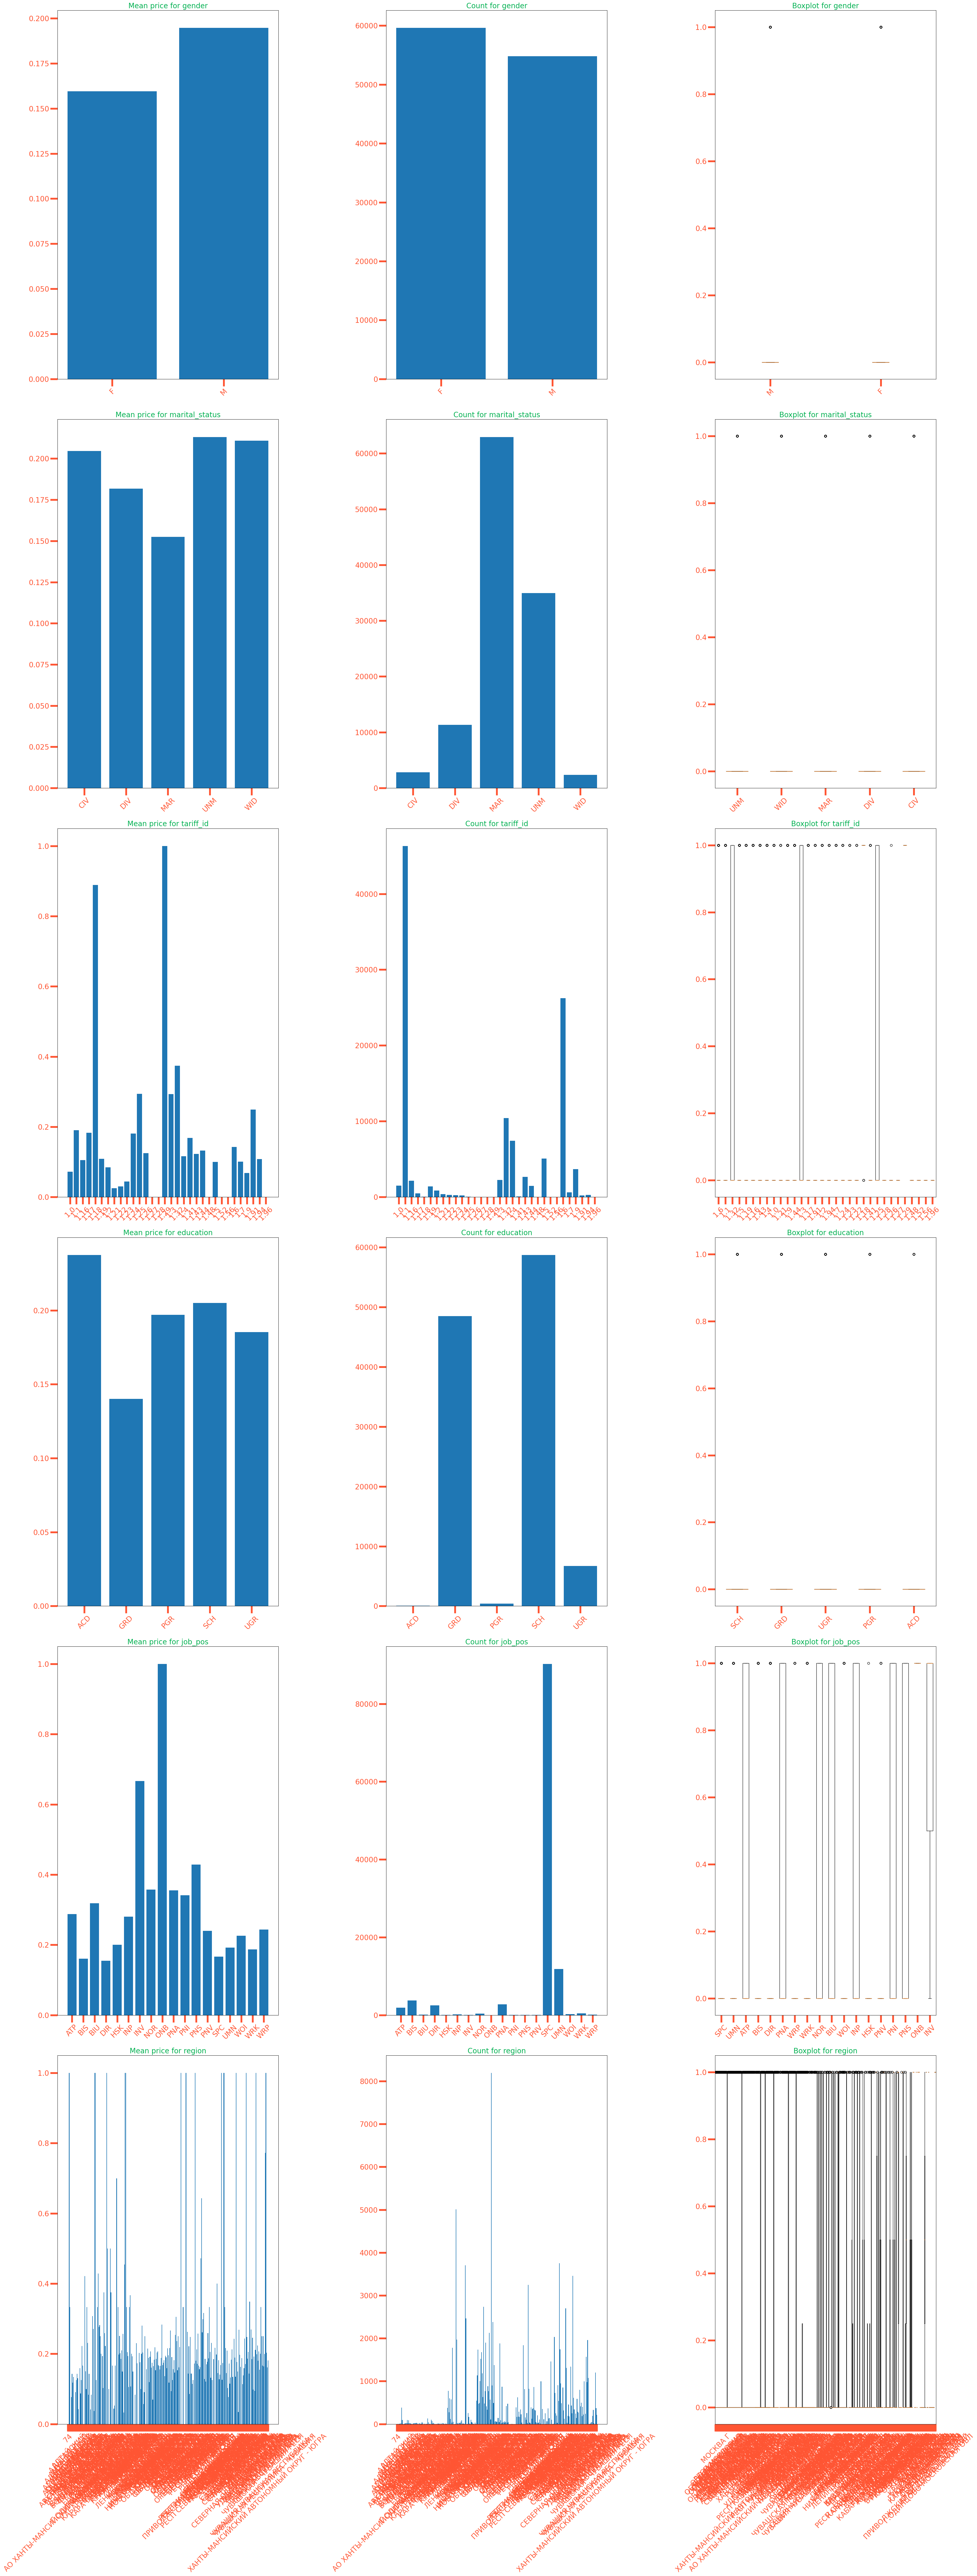

In [ ]:
visual_form(df,object_columns,'opened')

In [ ]:
df['credit_%'] = df['credit_sum'] / (df['income'] * df['credit_month'])

In [ ]:
df

,id,gender,age,marital_status,credit_sum,credit_month,tariff_id,education,credit_count,overdue_credit_count,job_pos,credit_score,region,income,opened,credit_%
0,26031,M,24,UNM,24000,10,1.6,SCH,2.0,0.0,SPC,0.728851,ОБЛ ЛЕНИНГРАДСКАЯ,35000.0,1,0.068571
1,148877,M,23,UNM,16339,18,1.1,SCH,2.0,0.0,SPC,0.347385,МОСКВА Г,38000.0,1,0.023887
2,142019,M,54,UNM,15652,10,1.32,GRD,2.0,0.0,SPC,0.349705,ОБЛ МОСКОВСКАЯ,38000.0,1,0.041189
3,146816,F,52,UNM,16560,10,1.1,SCH,1.0,0.0,SPC,0.359232,РЕСП МОРДОВИЯ,28000.0,0,0.059143
4,27699,F,63,WID,9078,18,1.1,SCH,4.0,0.0,SPC,0.529368,ЧЕЛЯБИНСКАЯ ОБЛ,30000.0,0,0.016811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114394,119880,M,29,MAR,29678,10,1.6,GRD,1.0,0.0,SPC,0.721156,ОМСКАЯ ОБЛАСТЬ,25000.0,0,0.118712
114395,103695,M,29,MAR,23068,15,1.1,GRD,3.0,0.0,SPC,0.566393,ТЮМЕНСКАЯ ОБЛ,30000.0,1,0.051262
114396,131933,F,45,MAR,16418,10,1.1,SCH,1.0,0.0,UMN,0.327380,ОБЛ БРЯНСКАЯ,30400.0,0,0.054007
114397,146868,F,49,MAR,12169,10,1.4,SCH,1.0,0.0,SPC,0.467395,ТАМБОВСКАЯ ОБЛ,16000.0,0,0.076056


In [ ]:
df.region.unique()

array(['ОБЛ ЛЕНИНГРАДСКАЯ', 'МОСКВА Г', 'ОБЛ МОСКОВСКАЯ', 'РЕСП МОРДОВИЯ',
       'ЧЕЛЯБИНСКАЯ ОБЛ', 'ОРЛОВСКАЯ ОБЛАСТЬ', 'ОБЛ АСТРАХАНСКАЯ',
       'СВЕРДЛОВСКАЯ ОБЛ', 'ТАТАРСТАН РЕСП', 'ОБЛ КАЛИНИНГРАДСКАЯ',
       'ТВЕРСКАЯ ОБЛАСТЬ', 'РЕСП БУРЯТИЯ', 'ОБЛ НОВГОРОДСКАЯ',
       'ТОМСКАЯ ОБЛАСТЬ', 'ОРЕНБУРГСКАЯ ОБЛ', 'КРАЙ ЗАБАЙКАЛЬСКИЙ',
       'КРАСНОДАРСКИЙ КРАЙ', 'РЕСП БАШКОРТОСТАН', 'РЕСПУБЛИКА ТАТАРСТАН',
       'САНКТ-ПЕТЕРБУРГ', 'РЕСПУБЛИКА АДЫГЕЯ', 'ОБЛ ИВАНОВСКАЯ',
       'ОБЛ КЕМЕРОВСКАЯ', 'КРАЙ СТАВРОПОЛЬСКИЙ', 'ОБЛ НОВОСИБИРСКАЯ',
       'АСТРАХАНСКАЯ ОБЛАСТЬ', 'СТАВРОПОЛЬСКИЙ КРАЙ', 'ОБЛ НИЖЕГОРОДСКАЯ',
       'ОБЛ ВЛАДИМИРСКАЯ', 'ТВЕРСКАЯ ОБЛ', 'САМАРСКАЯ ОБЛАСТЬ',
       'СВЕРДЛОВСКАЯ ОБЛАСТЬ', 'ЧЕЛЯБИНСКАЯ ОБЛАСТЬ',
       'СМОЛЕНСКАЯ ОБЛАСТЬ', 'ТЫВА РЕСП', 'ОБЛ САМАРСКАЯ', 'МОСКВА',
       'ИРКУТСКАЯ ОБЛ', 'ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - ЮГРА',
       'РЕСПУБЛИКА КАРЕЛИЯ', 'РЕСП КОМИ', 'ОБЛ САРАТОВСКАЯ',
       'ЯМАЛО-НЕНЕЦКИЙ АО', 'ХАКАСИЯ РЕСП', 'РОСТОВСКАЯ ОБЛ

In [ ]:
df[df.region.isna()]

,id,gender,age,marital_status,credit_sum,credit_month,tariff_id,education,credit_count,overdue_credit_count,job_pos,credit_score,region,income,opened,credit_%
199,24187,F,30,UNM,24355,10,1.32,GRD,2.0,0.0,UMN,0.319315,NaN,23000.0,0,0.105891
499,124065,M,21,UNM,21379,10,1.43,SCH,NaN,NaN,SPC,0.611062,NaN,30000.0,0,0.071263
526,150882,M,35,MAR,75389,10,1.44,GRD,2.0,0.0,SPC,0.664583,NaN,100000.0,0,0.075389
859,17933,M,26,UNM,25039,18,1.1,GRD,1.0,0.0,SPC,0.608078,NaN,37000.0,0,0.037596
1232,168969,F,41,MAR,17972,10,1.32,GRD,5.0,0.0,UMN,0.320842,NaN,43000.0,0,0.041795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110756,63228,M,29,UNM,35878,12,1.1,SCH,2.0,0.0,SPC,0.366759,NaN,35000.0,0,0.085424
112910,33743,M,32,MAR,22859,10,1.1,SCH,2.0,0.0,SPC,0.432334,NaN,81000.0,0,0.028221
113000,33040,F,35,DIV,7439,6,1.1,GRD,4.0,0.0,SPC,0.380461,NaN,25000.0,0,0.049593
113568,118034,M,40,MAR,5990,12,1.1,SCH,5.0,0.0,SPC,0.491030,NaN,40000.0,0,0.012479


In [ ]:
df_not_region =  df[df.region.isna()]
df = df.drop(index = df_not_region.index)

In [ ]:
reg_count = dict(df.region.value_counts())
reg_with_info = [x for x,y in zip(reg_count.keys(),reg_count.values()) if y > 10 ]

In [ ]:
df = df[df.region.isin(reg_with_info)]

In [ ]:
prop(df)

credit_count - 6168 - 0.054105737769629556%
overdue_credit_count - 6168 - 0.054105737769629556%


In [ ]:
df

,id,gender,age,marital_status,credit_sum,credit_month,tariff_id,education,credit_count,overdue_credit_count,job_pos,credit_score,region,income,opened,credit_%
0,26031,M,24,UNM,24000,10,1.6,SCH,2.0,0.0,SPC,0.728851,ОБЛ ЛЕНИНГРАДСКАЯ,35000.0,1,0.068571
1,148877,M,23,UNM,16339,18,1.1,SCH,2.0,0.0,SPC,0.347385,МОСКВА Г,38000.0,1,0.023887
2,142019,M,54,UNM,15652,10,1.32,GRD,2.0,0.0,SPC,0.349705,ОБЛ МОСКОВСКАЯ,38000.0,1,0.041189
3,146816,F,52,UNM,16560,10,1.1,SCH,1.0,0.0,SPC,0.359232,РЕСП МОРДОВИЯ,28000.0,0,0.059143
4,27699,F,63,WID,9078,18,1.1,SCH,4.0,0.0,SPC,0.529368,ЧЕЛЯБИНСКАЯ ОБЛ,30000.0,0,0.016811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114394,119880,M,29,MAR,29678,10,1.6,GRD,1.0,0.0,SPC,0.721156,ОМСКАЯ ОБЛАСТЬ,25000.0,0,0.118712
114395,103695,M,29,MAR,23068,15,1.1,GRD,3.0,0.0,SPC,0.566393,ТЮМЕНСКАЯ ОБЛ,30000.0,1,0.051262
114396,131933,F,45,MAR,16418,10,1.1,SCH,1.0,0.0,UMN,0.327380,ОБЛ БРЯНСКАЯ,30400.0,0,0.054007
114397,146868,F,49,MAR,12169,10,1.4,SCH,1.0,0.0,SPC,0.467395,ТАМБОВСКАЯ ОБЛ,16000.0,0,0.076056


# Заполнение пропусков

In [ ]:
prop(df)

credit_count - 6168 - 0.054105737769629556%
overdue_credit_count - 6168 - 0.054105737769629556%


In [ ]:
prop(df_test)

credit_count - 3041 - 0.05396915541200064%
overdue_credit_count - 3041 - 0.05396915541200064%
region - 60 - 0.0010648304257546985%
income - 1 - 1.774717376257831e-05%


In [ ]:
df['credit_count'] = df['credit_count'].fillna(0)
df['overdue_credit_count'] = df['overdue_credit_count'].fillna(0)
df_test['credit_count'] = df_test['credit_count'].fillna(0)
df_test['overdue_credit_count'] = df_test['overdue_credit_count'].fillna(0)
df_test.region = df_test.region.fillna(df.region.value_counts().index[0])
df_test.income = df_test.income.fillna(df.income.median())

In [ ]:
prop(df)

In [ ]:
prop(df_test)

# Первые модели




In [ ]:
X = df.drop(columns = ["id","opened"])
y = df.opened

In [ ]:
object_columns

Index(['gender', 'marital_status', 'tariff_id', 'education', 'job_pos',
       'region'],
      dtype='object')

In [ ]:
col_for_ohe = [col for col in object_columns if X[col].nunique() < 5]
col_for_mte = [col for col in object_columns if X[col].nunique() >= 5]
col_for_sc = [col for col in X.loc[:,X.dtypes != object].columns]

In [ ]:
col_for_ohe_idx = [list(X.columns).index(col) for col in col_for_ohe]
col_for_mte_idx = [list(X.columns).index(col) for col in col_for_mte]
col_for_sc_idx = [list(X.columns).index(col) for col in col_for_sc]

In [ ]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 2.9 MB/s eta 0:00:00


In [ ]:
from sklearn.compose import ColumnTransformer
from category_encoders.one_hot import OneHotEncoder
from category_encoders import TargetEncoder
from sklearn.preprocessing import StandardScaler

t = [
    ('OneHotEncoder',OneHotEncoder(),col_for_ohe_idx),
    ('MeanTargetEncoder',TargetEncoder(),col_for_mte_idx),
    ('StandartScaler',StandardScaler(),col_for_sc_idx),
]

col_transformer = ColumnTransformer(transformers = t)
col_transformer.fit(X,y)



ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(), [0]),
                                ('MeanTargetEncoder', TargetEncoder(),
                                 [2, 5, 6, 9, 11]),
                                ('StandartScaler', StandardScaler(),
                                 [1, 3, 4, 7, 8, 10, 12, 13])])

In [ ]:
col_transformer.get_feature_names_out()

array(['OneHotEncoder__gender_1', 'OneHotEncoder__gender_2',
       'MeanTargetEncoder__marital_status',
       'MeanTargetEncoder__tariff_id', 'MeanTargetEncoder__education',
       'MeanTargetEncoder__job_pos', 'MeanTargetEncoder__region',
       'StandartScaler__age', 'StandartScaler__credit_sum',
       'StandartScaler__credit_month', 'StandartScaler__credit_count',
       'StandartScaler__overdue_credit_count',
       'StandartScaler__credit_score', 'StandartScaler__income',
       'StandartScaler__credit_%'], dtype=object)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

params = {
    "n_estimators": 100,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
}

xgboost = GradientBoostingClassifier(**params)

In [ ]:
from sklearn.pipeline import Pipeline
pipe = Pipeline(
    [('column_transformer',col_transformer),
     ('xgboost',xgboost)])

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
pipe_line = Pipeline(
    [('column_transformer',col_transformer),
     ('model',LogisticRegression())])

In [ ]:
from sklearn.tree import DecisionTreeClassifier
pipe_tree = Pipeline(
    [('column_transformer',col_transformer),
     ('model',DecisionTreeClassifier(max_depth=20))])

In [ ]:
pipe.fit(X,y)
pipe_line.fit(X,y)
pipe_tree.fit(X,y)

Pipeline(steps=[('column_transformer',
                 ColumnTransformer(transformers=[('OneHotEncoder',
                                                  OneHotEncoder(), [0]),
                                                 ('MeanTargetEncoder',
                                                  TargetEncoder(),
                                                  [2, 5, 6, 9, 11]),
                                                 ('StandartScaler',
                                                  StandardScaler(),
                                                  [1, 3, 4, 7, 8, 10, 12,
                                                   13])])),
                ('model', DecisionTreeClassifier(max_depth=20))])

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import TimeSeriesSplit,KFold
splitter = KFold()


cv_result = cross_validate(pipe,X,y, scoring='f1',
                           cv=splitter, return_train_score=True)
cv_result

{'fit_time': array([32.92052221, 29.69379973, 25.73651576, 26.76910639, 27.27404165]),
 'score_time': array([0.13574171, 0.08323336, 0.08380818, 0.08250952, 0.09132528]),
 'test_score': array([0.00195695, 0.01502302, 0.00648217, 0.00559227, 0.0024777 ]),
 'train_score': array([0.00211851, 0.01496506, 0.01060419, 0.00443514, 0.00359935])}

In [ ]:
cv_liner = cross_validate(pipe_line,X,y, scoring='f1',
                           cv=splitter, return_train_score=True)
cv_liner

{'fit_time': array([0.90976191, 0.93519092, 0.91926146, 1.44185829, 1.49578166]),
 'score_time': array([0.05856252, 0.05635381, 0.06821108, 0.12129974, 0.06256199]),
 'test_score': array([0.08112954, 0.08370636, 0.07928094, 0.09025688, 0.07948835]),
 'train_score': array([0.08698127, 0.08475641, 0.0873407 , 0.08583545, 0.08613147])}

In [ ]:
cv_tree = cross_validate(pipe_tree,X,y, scoring='f1',
                           cv=splitter, return_train_score=True)
cv_tree

{'fit_time': array([1.56494117, 1.49006104, 1.65100408, 1.46315193, 1.41782808]),
 'score_time': array([0.04917288, 0.04610538, 0.04859328, 0.04536557, 0.04578447]),
 'test_score': array([0.29478781, 0.27413127, 0.27438469, 0.27951153, 0.28477011]),
 'train_score': array([0.75175399, 0.72833443, 0.73955643, 0.74175783, 0.75903077])}

In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y, pipe.predict_proba(X)[:, 1])


f1_scores = 2 * precision * recall / (precision + recall)


print("Best F-score: ", np.max(f1_scores))
print("Threshold for Best F-score: ", thresholds[np.argmax(f1_scores)])

Best F-score:  0.435530180522095
Threshold for Best F-score:  0.1861896791732291


In [ ]:
precision, recall, thresholds = precision_recall_curve(y, pipe_line.predict_proba(X)[:, 1])


f1_scores = 2 * precision * recall / (precision + recall)


print("Best F-score: ", np.max(f1_scores))
print("Threshold for Best F-score: ", thresholds[np.argmax(f1_scores)])

Best F-score:  0.4091762764818423
Threshold for Best F-score:  0.19459671037396542


In [ ]:
precision, recall, thresholds = precision_recall_curve(y, pipe_tree.predict_proba(X)[:, 1])


f1_scores = 2 * precision * recall / (precision + recall)


print("Best F-score: ", np.max(f1_scores))
print("Threshold for Best F-score: ", thresholds[np.argmax(f1_scores)])

Best F-score:  0.7425066220549282
Threshold for Best F-score:  0.37410071942446044


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score


print(f'Accuracy равно: {accuracy_score(y, pipe.predict(X)):.3f}' )

print(f'Precision равно: {precision_score(y, pipe.predict(X)):.3f}' )

print(f'Recall равно: {recall_score(y, pipe.predict(X)):.3f}' )

print(f'F-мера равно: {f1_score(y, pipe.predict(X)):.3f}' )

Accuracy равно: 0.824
Precision равно: 0.949
Recall равно: 0.002
F-мера равно: 0.004


In [ ]:
print(f'Accuracy равно: {accuracy_score(y, pipe_line.predict(X)):.3f}' )

print(f'Precision равно: {precision_score(y, pipe_line.predict(X)):.3f}' )

print(f'Recall равно: {recall_score(y, pipe_line.predict(X)):.3f}' )

print(f'F-мера равно: {f1_score(y, pipe_line.predict(X)):.3f}' )

Accuracy равно: 0.824
Precision равно: 0.500
Recall равно: 0.050
F-мера равно: 0.091


In [ ]:
print(f'Accuracy равно: {accuracy_score(y, pipe_tree.predict(X)):.3f}' )

print(f'Precision равно: {precision_score(y, pipe_tree.predict(X)):.3f}' )

print(f'Recall равно: {recall_score(y, pipe_tree.predict(X)):.3f}' )

print(f'F-мера равно: {f1_score(y, pipe_tree.predict(X)):.3f}' )

Accuracy равно: 0.922
Precision равно: 0.932
Recall равно: 0.604
F-мера равно: 0.733


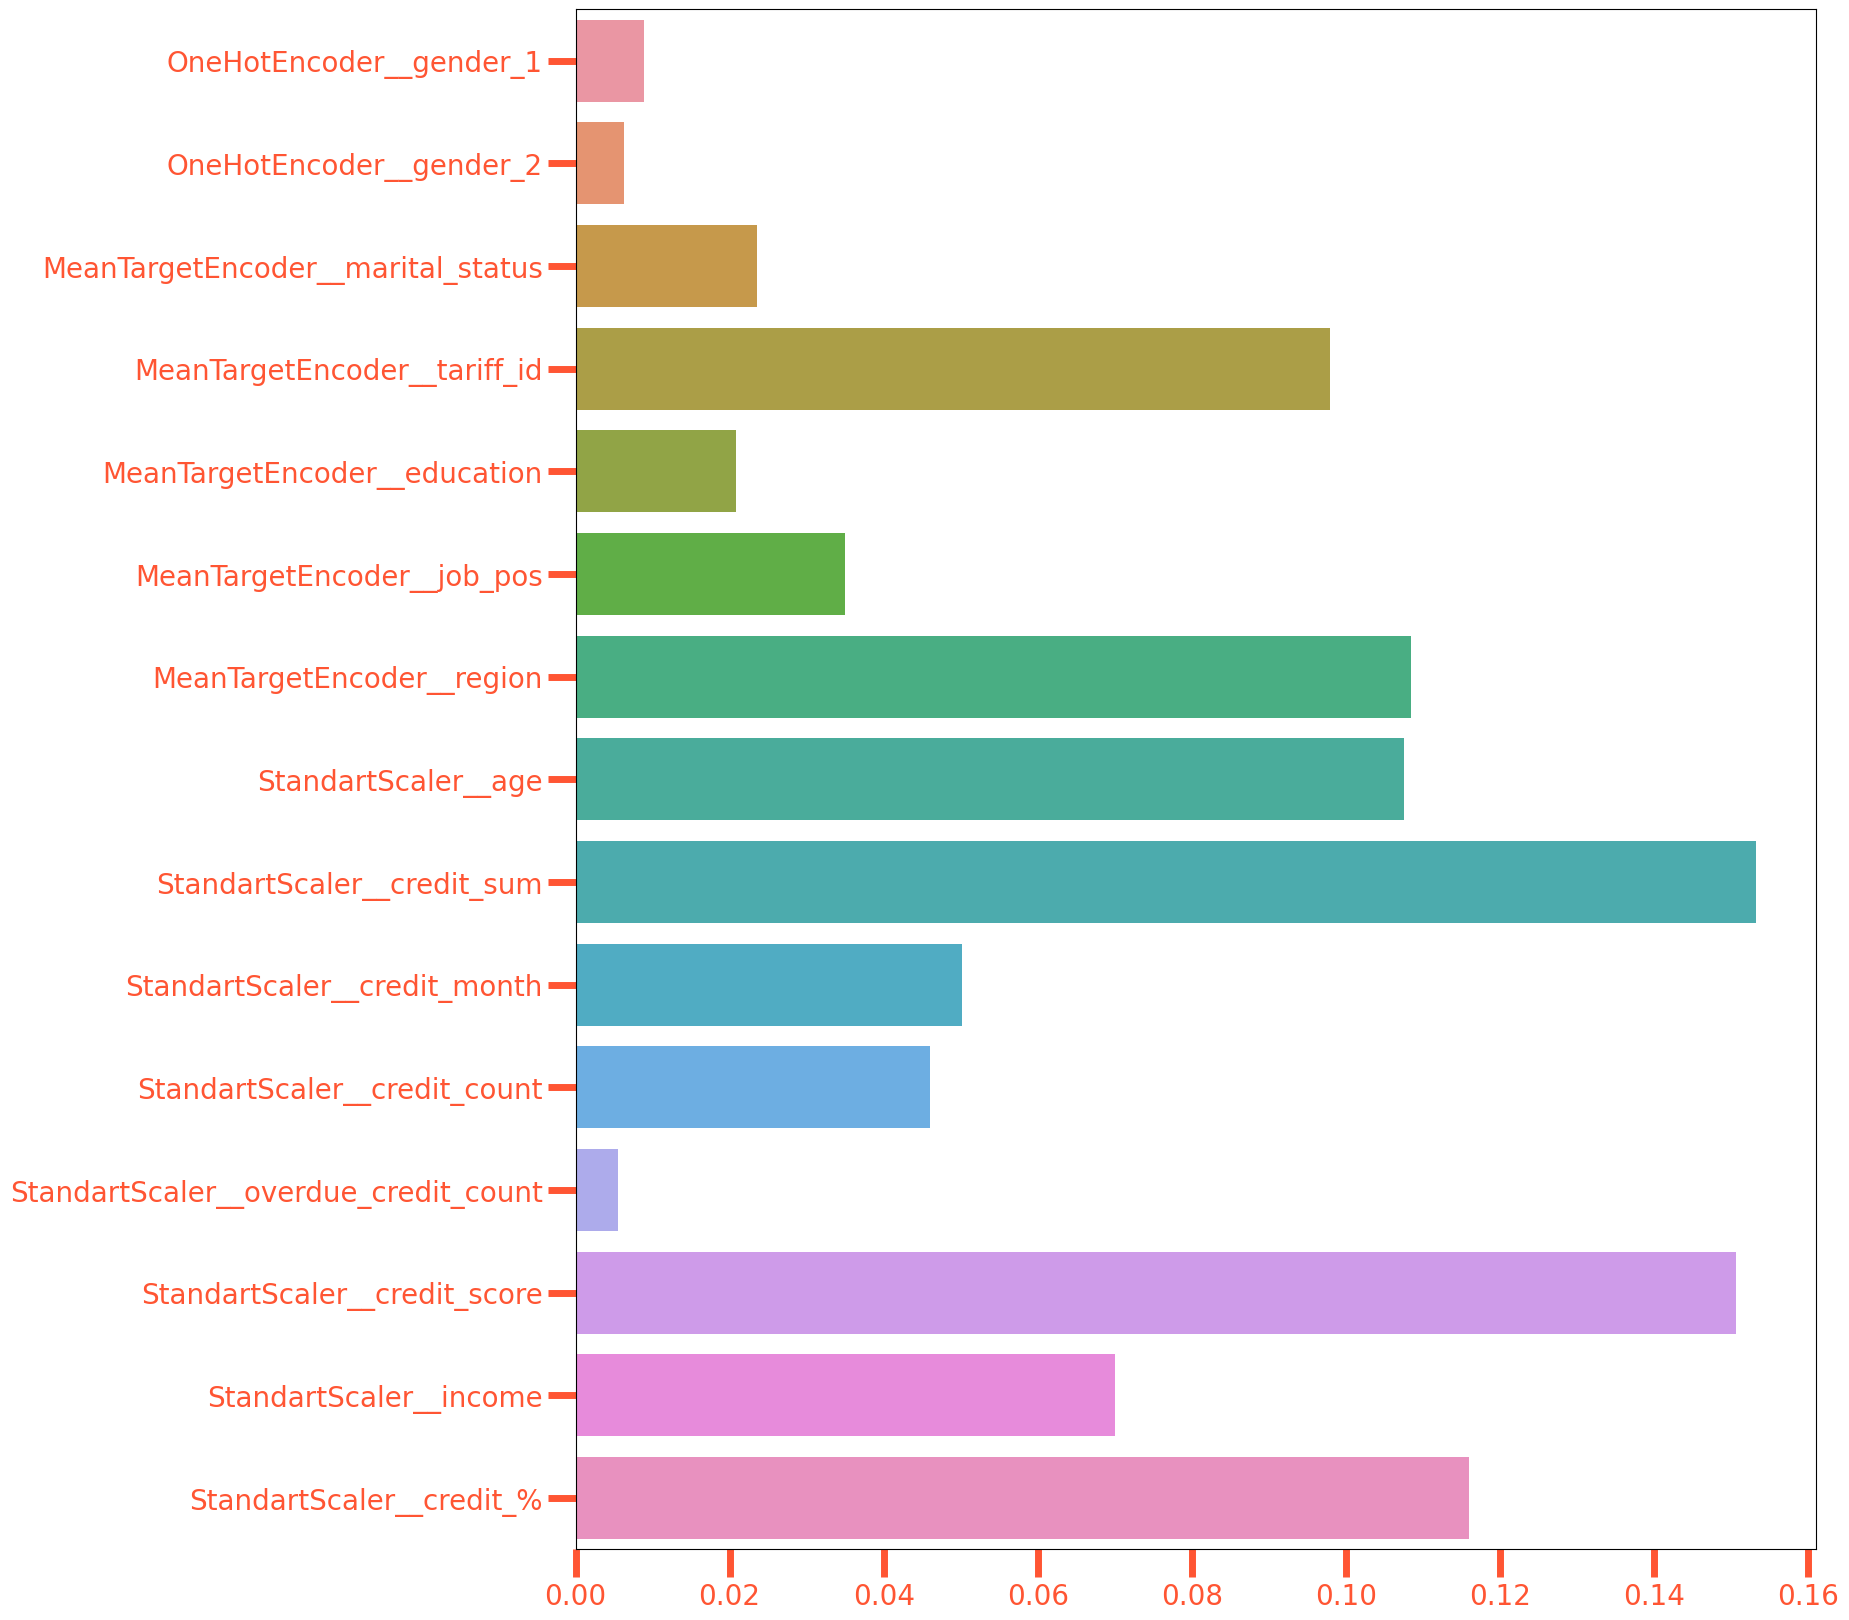

In [ ]:

fig = plt.figure()
fig.set_size_inches(16, 20)

sns.barplot(x= pipe_tree['model'].feature_importances_,
            y= col_transformer.get_feature_names_out())


plt.show()

# Ответ

In [ ]:
df_test['credit_%'] = df_test['credit_sum'] / (df_test['income'] * df_test['credit_month'])

In [ ]:
df_test['is_positive'] = pipe_tree.predict(df_test).astype(bool)

In [ ]:
df_test

,id,gender,age,marital_status,credit_sum,credit_month,tariff_id,education,credit_count,overdue_credit_count,job_pos,credit_score,region,income,credit_%,is_positive
0,39162,F,18,UNM,39469,6,1.6,GRD,0.0,0.0,SPC,0.424628,САНКТ-ПЕТЕРБУРГ Г,30000.0,0.219272,False
1,10673,F,63,WID,16693,10,1.1,GRD,2.0,0.0,SPC,0.311945,ОБЛ ЛЕНИНГРАДСКАЯ,21250.0,0.078555,False
2,121409,M,42,MAR,60260,10,1.32,GRD,5.0,0.0,SPC,0.421982,МОСКВА Г,150000.0,0.040173,True
3,23504,M,41,MAR,32479,12,1.1,GRD,1.0,0.0,DIR,0.406572,ТАТАРСТАН РЕСП,150000.0,0.018044,False
4,69269,F,24,UNM,8159,12,1.1,SCH,2.0,0.0,SPC,0.418243,ТВЕРСКАЯ ОБЛ,16000.0,0.042495,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56342,14148,F,21,UNM,40980,24,1.6,GRD,1.0,0.0,SPC,0.429402,САМАРСКАЯ,22000.0,0.077614,False
56343,153732,M,56,MAR,16009,10,1.1,SCH,0.0,0.0,SPC,0.494229,САМАРСКАЯ ОБЛ,29000.0,0.055203,False
56344,37647,M,54,MAR,22448,12,1.6,SCH,1.0,0.0,UMN,0.312089,РОСТОВСКАЯ ОБЛ,26500.0,0.070591,False
56345,92808,F,27,UNM,13829,10,1.1,GRD,2.0,0.0,SPC,0.339009,ОБЛ СВЕРДЛОВСКАЯ,38000.0,0.036392,False


In [ ]:
df_test['is_positive'].mean()

0.1408060766322963

In [ ]:
df_test[['id','is_positive']].to_csv("answer.csv",index = False)

# Новые идеи,улучшенеи модели


In [ ]:
df

,id,gender,age,marital_status,credit_sum,credit_month,tariff_id,education,credit_count,overdue_credit_count,job_pos,credit_score,region,income,opened,credit_%
0,26031,M,24,UNM,24000,10,1.6,SCH,2.0,0.0,SPC,0.728851,ОБЛ ЛЕНИНГРАДСКАЯ,35000.0,1,0.068571
1,148877,M,23,UNM,16339,18,1.1,SCH,2.0,0.0,SPC,0.347385,МОСКВА Г,38000.0,1,0.023887
2,142019,M,54,UNM,15652,10,1.32,GRD,2.0,0.0,SPC,0.349705,ОБЛ МОСКОВСКАЯ,38000.0,1,0.041189
3,146816,F,52,UNM,16560,10,1.1,SCH,1.0,0.0,SPC,0.359232,РЕСП МОРДОВИЯ,28000.0,0,0.059143
4,27699,F,63,WID,9078,18,1.1,SCH,4.0,0.0,SPC,0.529368,ЧЕЛЯБИНСКАЯ ОБЛ,30000.0,0,0.016811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114394,119880,M,29,MAR,29678,10,1.6,GRD,1.0,0.0,SPC,0.721156,ОМСКАЯ ОБЛАСТЬ,25000.0,0,0.118712
114395,103695,M,29,MAR,23068,15,1.1,GRD,3.0,0.0,SPC,0.566393,ТЮМЕНСКАЯ ОБЛ,30000.0,1,0.051262
114396,131933,F,45,MAR,16418,10,1.1,SCH,1.0,0.0,UMN,0.327380,ОБЛ БРЯНСКАЯ,30400.0,0,0.054007
114397,146868,F,49,MAR,12169,10,1.4,SCH,1.0,0.0,SPC,0.467395,ТАМБОВСКАЯ ОБЛ,16000.0,0,0.076056


In [ ]:
df.overdue_credit_count.value_counts()

0.0    109112
1.0      4854
2.0        30
3.0         3
Name: overdue_credit_count, dtype: int64

In [ ]:
np.var(df.overdue_credit_count)

0.042003897110382986

In [ ]:
df.tariff_id = df.tariff_id.astype(float)

df['repayment'] = df.tariff_id * df.credit_sum
df['pay_mounth'] = df.tariff_id * df.credit_sum / df.credit_month
df['remainder'] = (df.income - df.pay_mounth) / df.income

In [ ]:
df

,id,gender,age,marital_status,credit_sum,credit_month,tariff_id,education,credit_count,overdue_credit_count,job_pos,credit_score,region,income,opened,credit_%,repayment,pay_mounth,remainder
0,26031,M,24,UNM,24000,10,1.60,SCH,2.0,0.0,SPC,0.728851,ОБЛ ЛЕНИНГРАДСКАЯ,35000.0,1,0.068571,38400.00,3840.000000,0.890286
1,148877,M,23,UNM,16339,18,1.10,SCH,2.0,0.0,SPC,0.347385,МОСКВА Г,38000.0,1,0.023887,17972.90,998.494444,0.973724
2,142019,M,54,UNM,15652,10,1.32,GRD,2.0,0.0,SPC,0.349705,ОБЛ МОСКОВСКАЯ,38000.0,1,0.041189,20660.64,2066.064000,0.945630
3,146816,F,52,UNM,16560,10,1.10,SCH,1.0,0.0,SPC,0.359232,РЕСП МОРДОВИЯ,28000.0,0,0.059143,18216.00,1821.600000,0.934943
4,27699,F,63,WID,9078,18,1.10,SCH,4.0,0.0,SPC,0.529368,ЧЕЛЯБИНСКАЯ ОБЛ,30000.0,0,0.016811,9985.80,554.766667,0.981508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114394,119880,M,29,MAR,29678,10,1.60,GRD,1.0,0.0,SPC,0.721156,ОМСКАЯ ОБЛАСТЬ,25000.0,0,0.118712,47484.80,4748.480000,0.810061
114395,103695,M,29,MAR,23068,15,1.10,GRD,3.0,0.0,SPC,0.566393,ТЮМЕНСКАЯ ОБЛ,30000.0,1,0.051262,25374.80,1691.653333,0.943612
114396,131933,F,45,MAR,16418,10,1.10,SCH,1.0,0.0,UMN,0.327380,ОБЛ БРЯНСКАЯ,30400.0,0,0.054007,18059.80,1805.980000,0.940593
114397,146868,F,49,MAR,12169,10,1.40,SCH,1.0,0.0,SPC,0.467395,ТАМБОВСКАЯ ОБЛ,16000.0,0,0.076056,17036.60,1703.660000,0.893521


In [ ]:
df[df['remainder'] < 0][df['opened'] == 1]

,id,gender,age,marital_status,credit_sum,credit_month,tariff_id,education,credit_count,overdue_credit_count,job_pos,credit_score,region,income,opened,credit_%,repayment,pay_mounth,remainder
32356,57129,F,32,MAR,169000,12,1.5,GRD,3.0,0.0,UMN,0.357769,ОБЛ ВОЛОГОДСКАЯ,10000.0,1,1.408333,253500.0,21125.0,-1.1125
112041,34965,F,56,WID,34200,6,1.3,GRD,4.0,0.0,PNA,0.386074,РЕСП СЕВЕРНАЯ ОСЕТИЯ - АЛАНИЯ,6000.0,1,0.950000,44460.0,7410.0,-0.2350


In [ ]:
index_drop = df[df['remainder'] < 0][df['opened'] == 1].index
df = df.drop(index = index_drop)

In [ ]:
#подготовка данных
X = df.drop(columns = ["id","opened"])
y = df.opened

col_for_ohe = [col for col in object_columns if X[col].nunique() < 5]
col_for_mte = [col for col in object_columns if X[col].nunique() >= 5]
col_for_sc = [col for col in X.loc[:,X.dtypes != object].columns]

col_for_ohe_idx = [list(X.columns).index(col) for col in col_for_ohe]
col_for_mte_idx = [list(X.columns).index(col) for col in col_for_mte]
col_for_sc_idx = [list(X.columns).index(col) for col in col_for_sc]

t = [
    ('OneHotEncoder',OneHotEncoder(),col_for_ohe_idx),
    ('MeanTargetEncoder',TargetEncoder(),col_for_mte_idx),
    ('StandartScaler',StandardScaler(),col_for_sc_idx),
]

col_transformer = ColumnTransformer(transformers = t)
col_transformer.fit(X,y)

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(), [0]),
                                ('MeanTargetEncoder', TargetEncoder(),
                                 [2, 5, 6, 9, 11]),
                                ('StandartScaler', StandardScaler(),
                                 [1, 3, 4, 5, 7, 8, 10, 12, 13, 14, 15, 16])])

In [ ]:
from sklearn.tree import DecisionTreeClassifier
pipe_tree = Pipeline(
    [('column_transformer',col_transformer),
     ('model',DecisionTreeClassifier(max_depth=20))])

In [ ]:
pipe_tree.fit(X,y)

Pipeline(steps=[('column_transformer',
                 ColumnTransformer(transformers=[('OneHotEncoder',
                                                  OneHotEncoder(), [0]),
                                                 ('MeanTargetEncoder',
                                                  TargetEncoder(),
                                                  [2, 5, 6, 9, 11]),
                                                 ('StandartScaler',
                                                  StandardScaler(),
                                                  [1, 3, 4, 5, 7, 8, 10, 12, 13,
                                                   14, 15, 16])])),
                ('model', DecisionTreeClassifier(max_depth=20))])

In [ ]:
cv_tree = cross_validate(pipe_tree,X,y, scoring='f1',
                           cv=splitter, return_train_score=True)
cv_tree

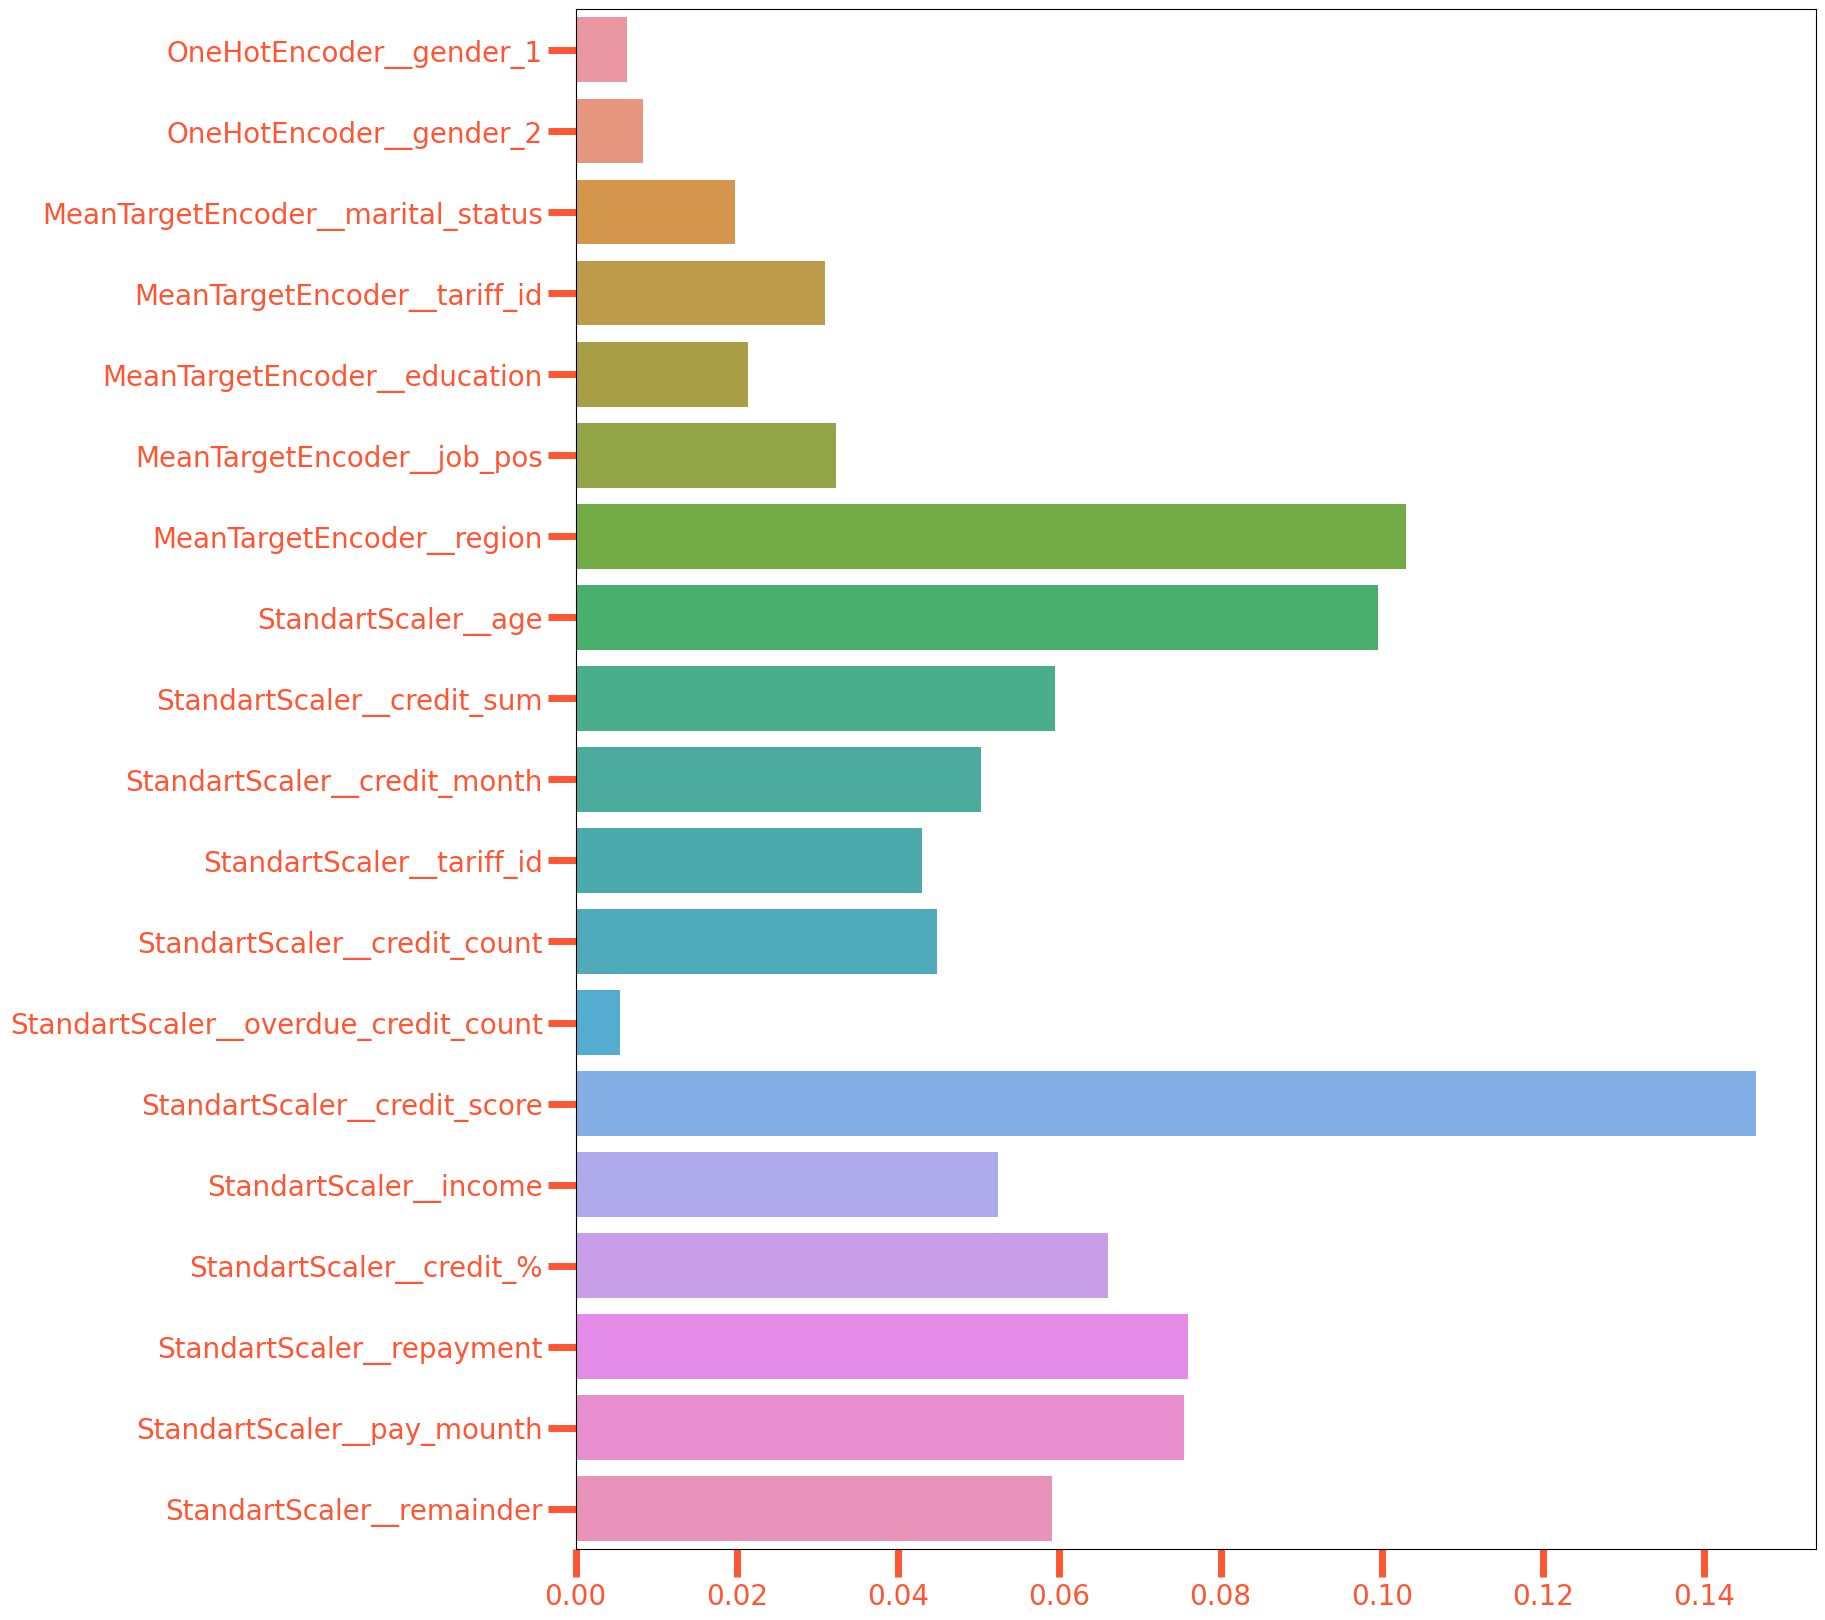

In [ ]:
fig = plt.figure()
fig.set_size_inches(16, 20)

sns.barplot(x= pipe_tree['model'].feature_importances_,
            y= col_transformer.get_feature_names_out())


plt.show()

In [ ]:
print(f'Accuracy равно: {accuracy_score(y, pipe_tree.predict(X)):.3f}' )

print(f'Precision равно: {precision_score(y, pipe_tree.predict(X)):.3f}' )

print(f'Recall равно: {recall_score(y, pipe_tree.predict(X)):.3f}' )

print(f'F-мера равно: {f1_score(y, pipe_tree.predict(X)):.3f}' )

Accuracy равно: 0.924
Precision равно: 0.940
Recall равно: 0.605
F-мера равно: 0.736


- попробовать нейронки